## Decision Tree

### - Trees
* Classification Tree : to predict fixed or categorical targets
* Regression Tree : to predict targets' value

### - Ensemble Methods
* Bagging : Bootstrap AGgregation, Train each trees independently
* Random Forests : Decorrelated trees, Split only randomly selected m trees
* Boosting : Train each trees by order (unlike Bagging)

### 1. Classification Tree

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import warnings
warnings.filterwarnings(action='ignore')

#### Data Load & Preprocess

In [2]:
diabetes = pd.read_csv('./diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Select columns except the Outcome/
diabetes_feat = diabetes.columns.tolist()[:-1]

In [4]:
size = int(len(diabetes)*0.8)
size

614

In [5]:
train = diabetes[:size]
test = diabetes[size:]

X_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
X_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])

#### Train a Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
RANDOM_SEED = 12

# Train the tree.
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

print("Training Accuracy: {:.4f}".format(clf.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

Training Accuracy: 1.0000
Test Accuracy: 0.6948


In [7]:
# Training Acc == 100% & Training Acc > Test Acc
# : Overfitting
# Can't be generalized to new data.

In [8]:
# Prun the tree.
# To prevent overfitting problems,
# You can pre-prun the tree or set the maximum depth of the tree.

clf = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

print("Training Accuracy: {:.4f}".format(clf.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(clf.score(X_test, y_test)))

Training Accuracy: 0.7590
Test Accuracy: 0.7338


In [9]:
# It might drop the training accuracy, but you can get better test accuracy.

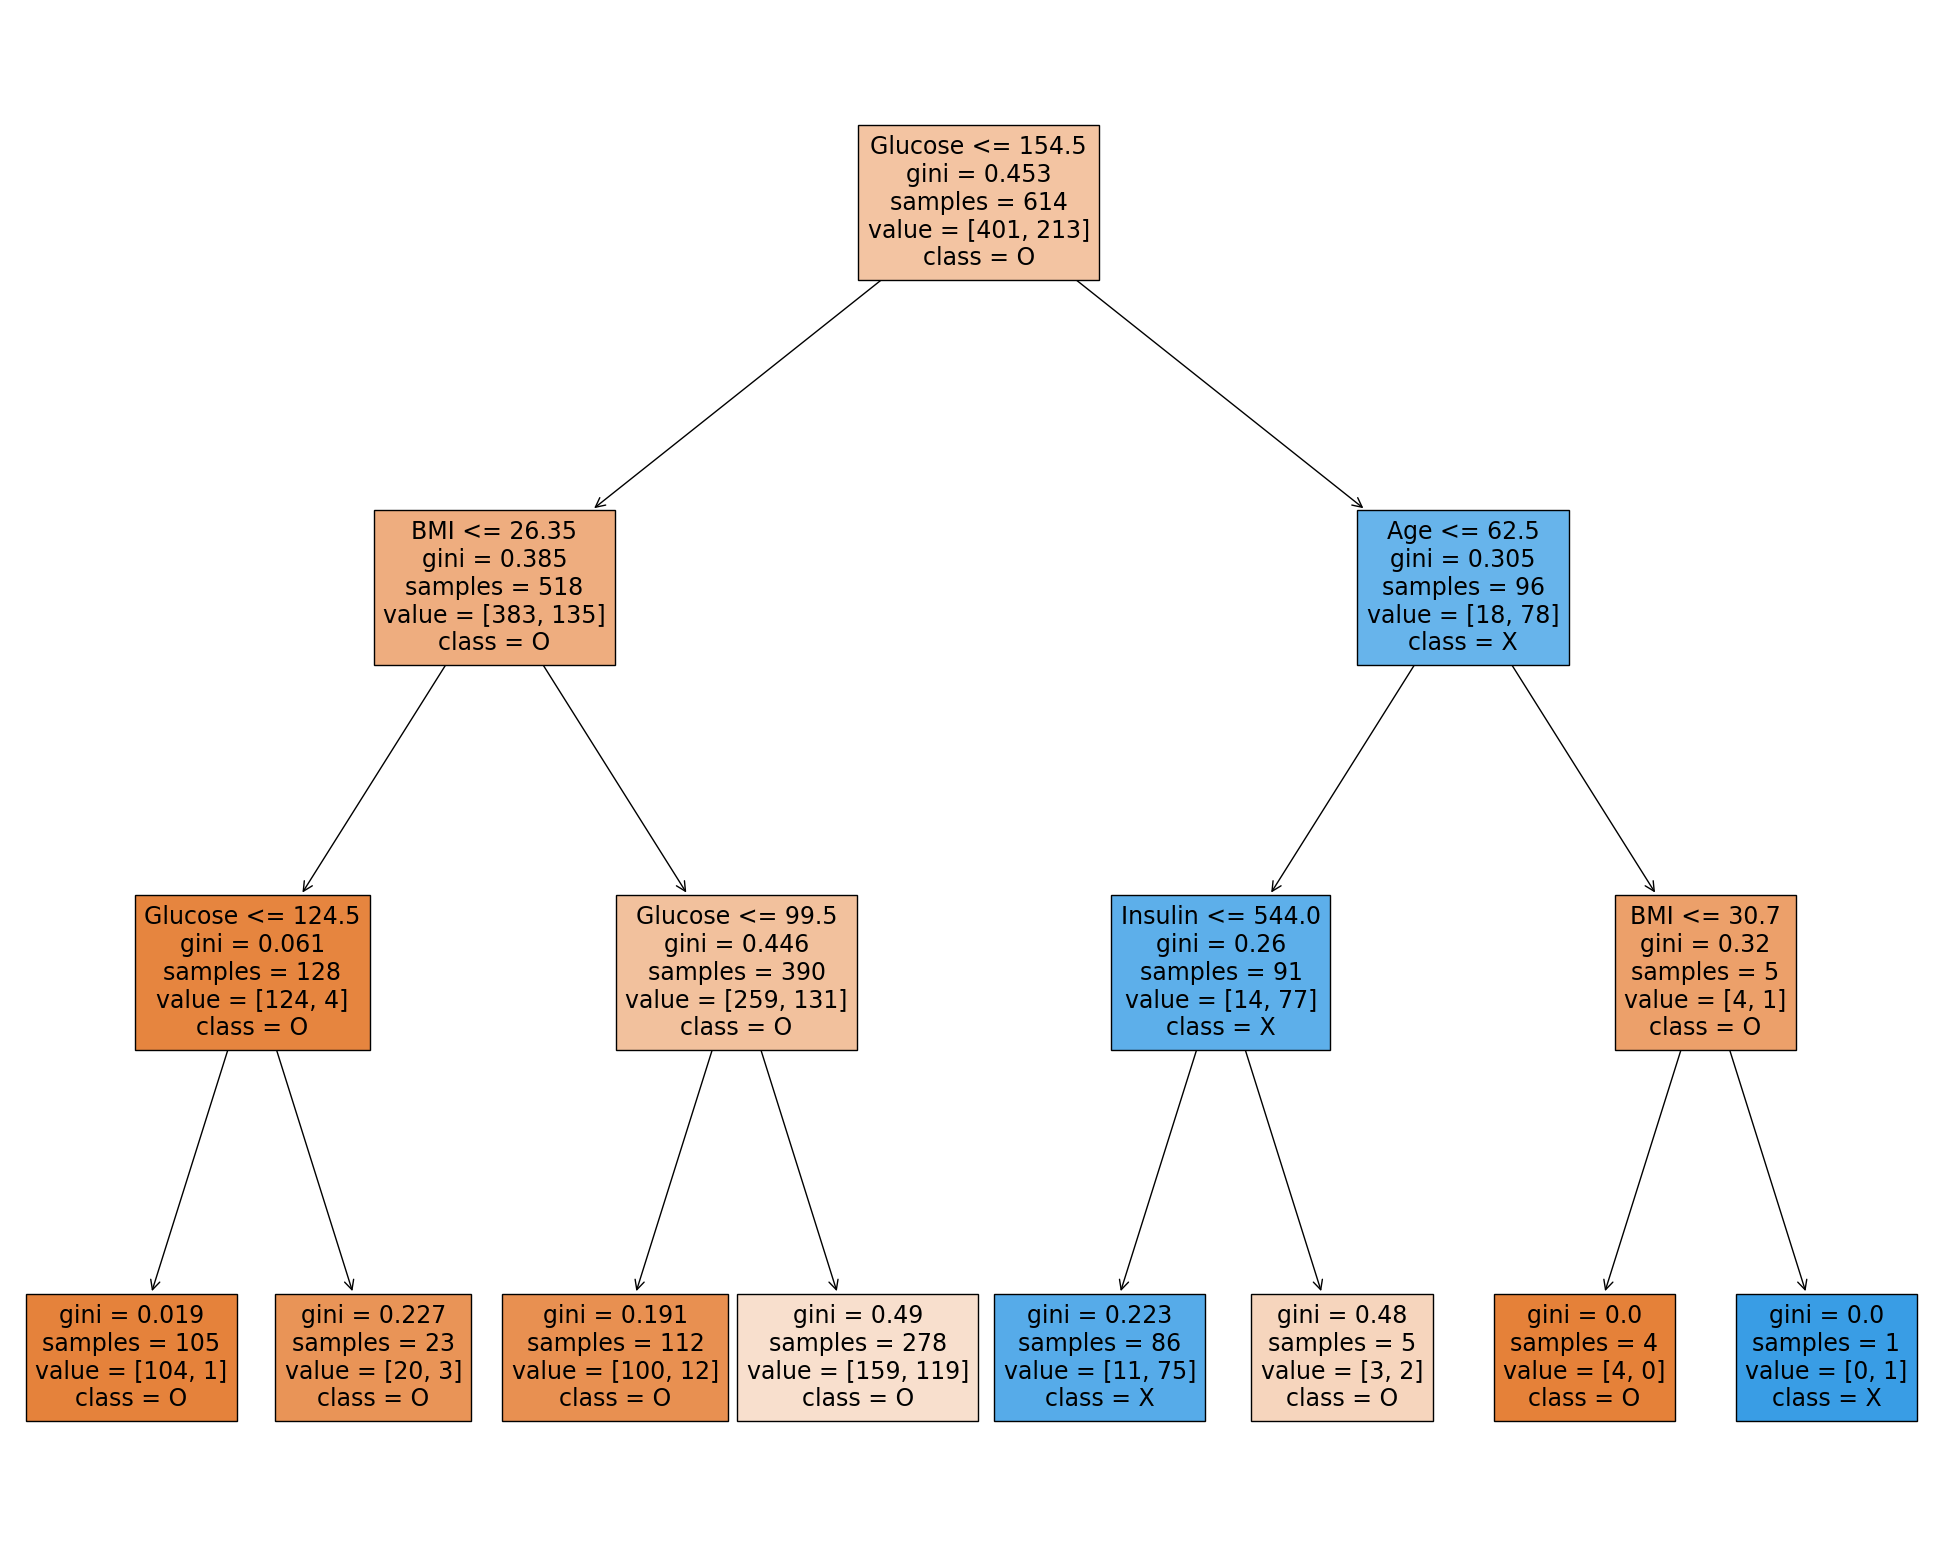

In [9]:
# Visualize the tree.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=diabetes_feat,
                   class_names=['O', 'X'],
                   filled=True)

# Save the picture.
# fig.savefig('./decision_tree.png')

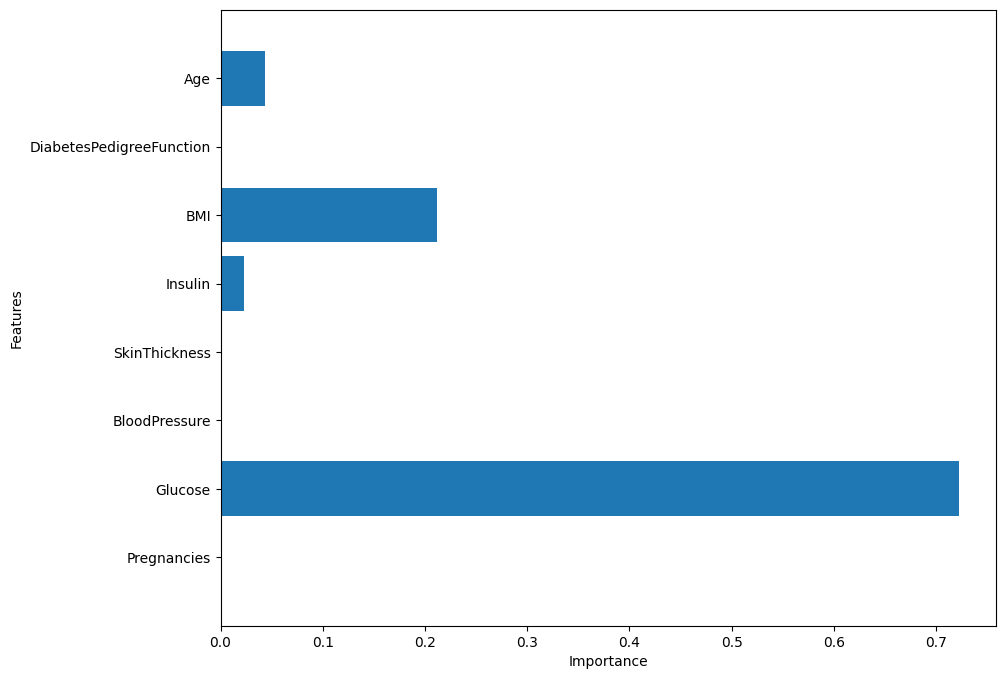

In [10]:
# Check the importance of each features in the decision tree.
def plot_importance_of_feats(tree):
    plt.figure(figsize=(10, 8))
    n_feat = len(diabetes_feat)
    
    plt.barh(range(0, n_feat), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), diabetes_feat)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_feat)
    
plot_importance_of_feats(clf)

#### Build a Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model.
rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

print("Training Accuracy: {:.4f}".format(rf.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(rf.score(X_test, y_test)))

Training Accuracy: 1.0000
Test Accuracy: 0.7662


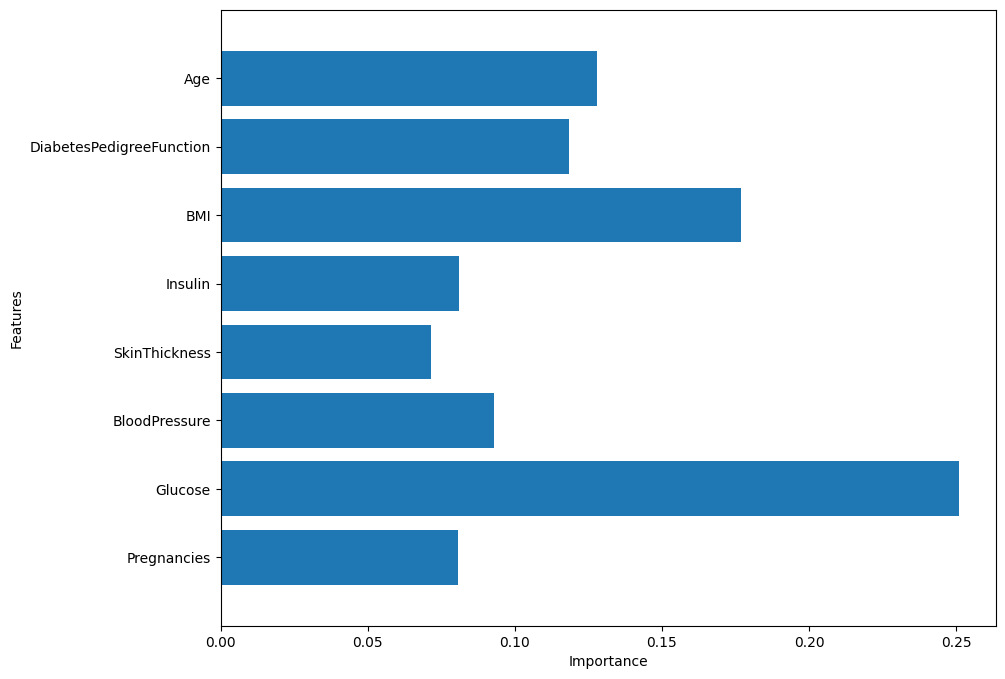

In [20]:
plot_importance_of_feats(rf)

In [19]:
# To avoid overfitting,
# Set max_features and max_depth.
rf_1 = RandomForestClassifier(max_depth=3,
                              max_features=2,
                              n_estimators=100,
                              random_state=RANDOM_SEED)
rf_1.fit(X_train, y_train)

print("Training Accuracy: {:.4f}".format(rf_1.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(rf_1.score(X_test, y_test)))

Training Accuracy: 0.8013
Test Accuracy: 0.7597


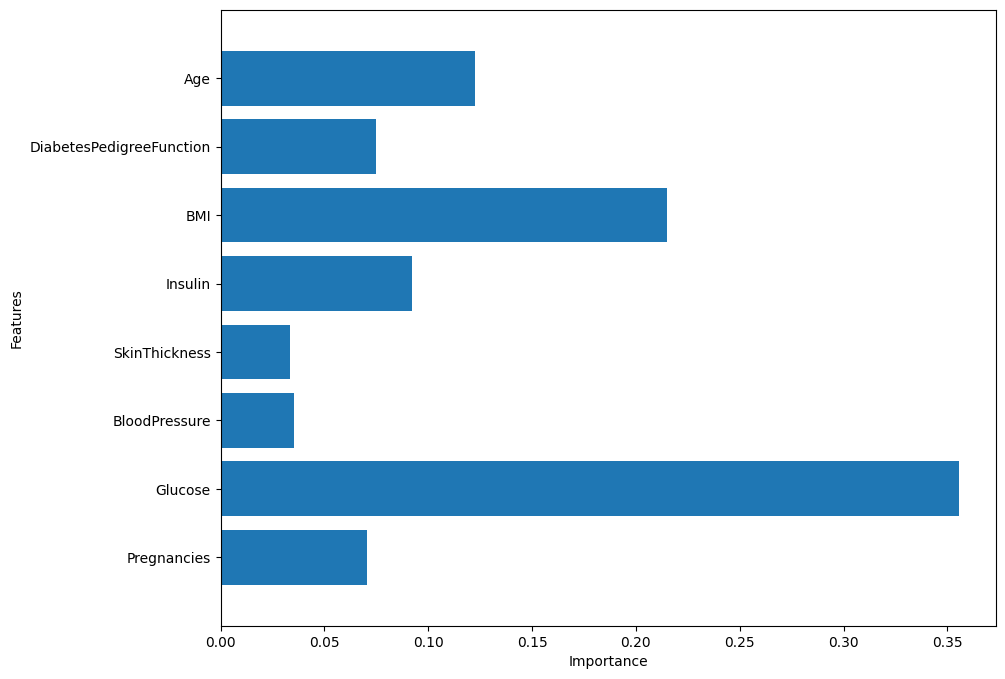

In [21]:
plot_importance_of_feats(rf_1)

#### Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit the model.
gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

print("Training Accuracy: {:.4f}".format(gb.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(gb.score(X_test, y_test)))

Training Accuracy: 0.9235
Test Accuracy: 0.7597


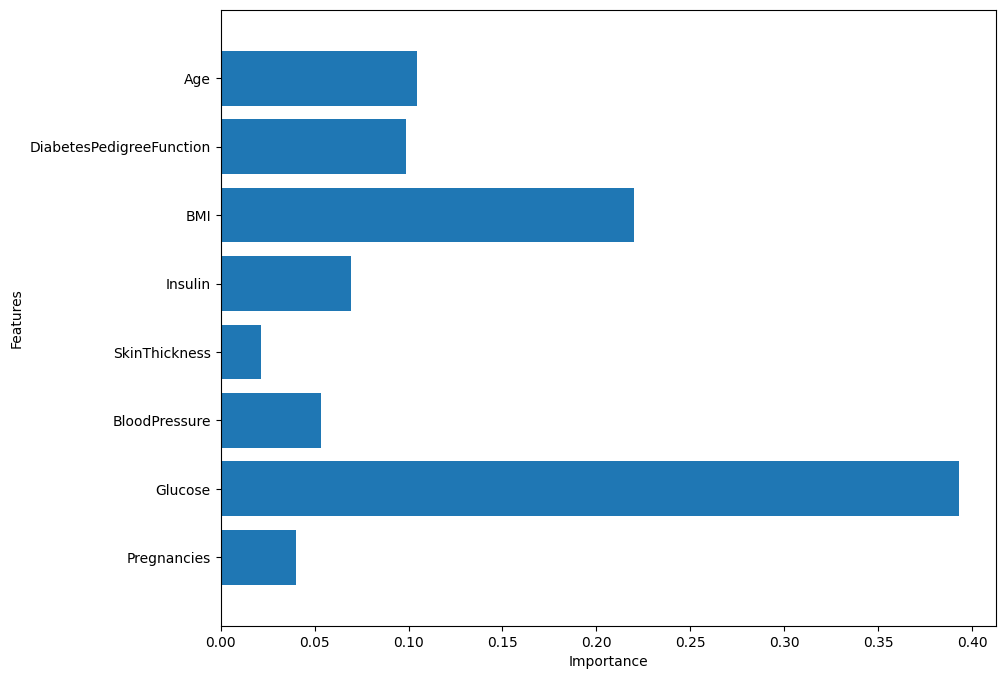

In [35]:
plot_importance_of_feats(gb)

In [33]:
# You can also adjust parameters to reduce the overfitting.
gb_1 = GradientBoostingClassifier(random_state=RANDOM_SEED, max_depth=2, learning_rate=0.5)
gb_1.fit(X_train, y_train)

print("Training Accuracy: {:.4f}".format(gb_1.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(gb_1.score(X_test, y_test)))

Training Accuracy: 0.9756
Test Accuracy: 0.7727


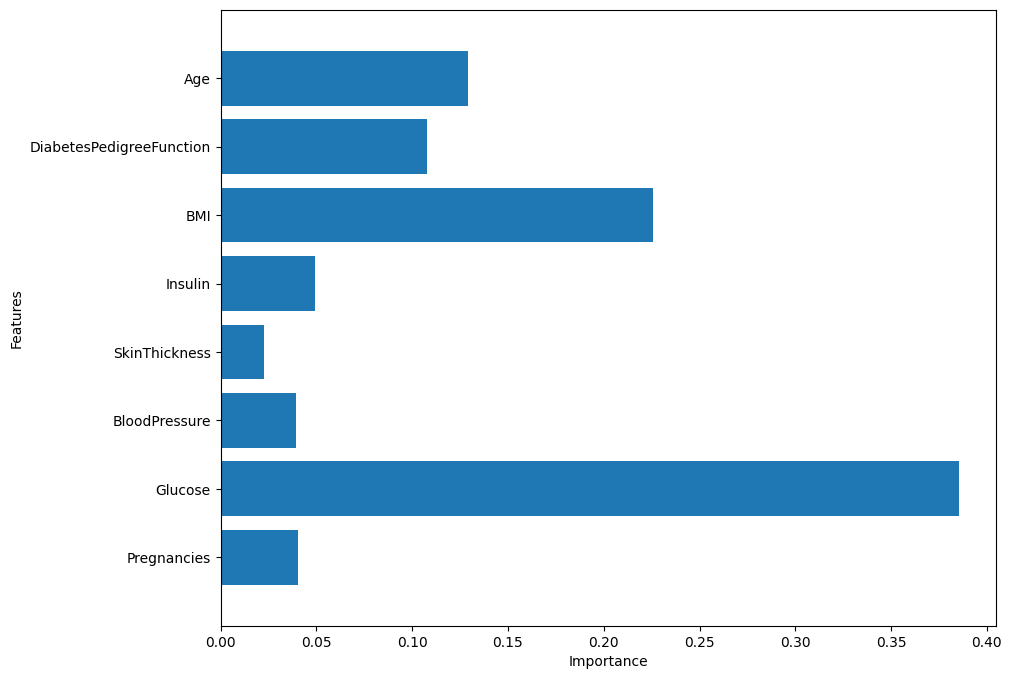

In [34]:
plot_importance_of_feats(gb_1)